In [86]:
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
decay = np.genfromtxt("decay.dat")
decay

array([[0.00000e+00, 1.33611e+05],
       [4.00000e+00, 9.43430e+04],
       [8.00000e+00, 6.73560e+04],
       [1.20000e+01, 4.72810e+04],
       [1.60000e+01, 3.36710e+04],
       [2.00000e+01, 2.37470e+04],
       [2.40000e+01, 1.66630e+04],
       [2.80000e+01, 1.20030e+04],
       [3.20000e+01, 8.48900e+03],
       [3.60000e+01, 5.99300e+03],
       [4.00000e+01, 4.27600e+03],
       [4.40000e+01, 2.99700e+03],
       [4.80000e+01, 2.09000e+03],
       [5.20000e+01, 1.48600e+03],
       [5.60000e+01, 1.09400e+03],
       [6.00000e+01, 7.56000e+02],
       [6.40000e+01, 5.42000e+02],
       [6.80000e+01, 3.48000e+02],
       [7.20000e+01, 2.66000e+02],
       [7.60000e+01, 2.07000e+02]])

In [59]:
order = 4
dof = len(decay)-1-order
coefs = np.polyfit(decay[:,0],decay[:,1],order)[::-1]
print(coefs[::-1])

[ 1.93012530e-02 -3.93079421e+00  2.95364330e+02 -9.92363686e+03
  1.31394550e+05]


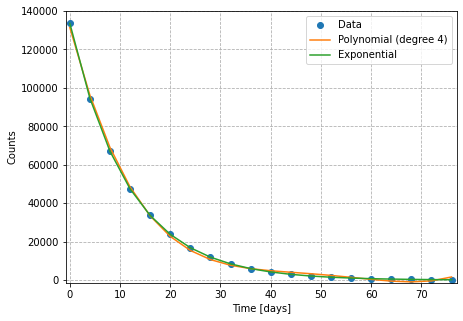

In [111]:
x = np.linspace(0,76,len(decay))
fit1 = np.sum([coefs[i]*x**i for i in range(order+1)],axis=0)
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(decay[:,0],decay[:,1],"o",label="Data")
ax.plot(x,fit1,label="Polynomial (degree 4)")
ax.plot(x,fit2,label="Exponential")
ax.set(xlabel="Time [days]",ylabel="Counts",xlim=(-.77,77),ylim=(-1400,140000))
ax.grid(linestyle="--")
ax.legend()
fig.savefig("decay.png",dpi=300,bbox_inches="tight")

In [90]:
expo = lambda x,a,b : a*np.exp(x*b)
params, pcov = curve_fit(expo,decay[:,0],decay[:,1],p0=[135000,-0.2])
fit2 = expo(x,*params)

In [112]:
chisq = np.abs(np.sum([(decay[i,1]-fit1[i])*(decay[i,1]-fit1[i])/fit1[i] for i in range(len(decay))]))
print(chisq)
print(chisq/dof)

1606.5324140686234
107.10216093790822
